In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded=files.upload()
heart_disease_original=pd.read_csv('heart.csv')
print(heart_disease_original)

Saving heart.csv to heart (1).csv
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  

In [ ]:
heart_disease_original.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_disease_original.shape

(303, 14)

In [ ]:
for i in heart_disease_original:
  print(len(heart_disease_original[i].unique()))

41
2
4
49
152
2
3
91
2
40
3
5
4
2


In [ ]:
heart_disease_original.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [ ]:
heart_disease_original.duplicated(keep="first").sum()


np.int64(1)

In [ ]:
heart_disease_original.drop_duplicates(keep='first',inplace=True)
heart_disease_original.duplicated(keep="first").sum()

np.int64(0)

In [ ]:
correlation=heart_disease_original.corr()
correlation['output'].abs().sort_values(ascending=False)

,output
output,1.000000
exng,0.435601
cp,0.432080
oldpeak,0.429146
thalachh,0.419955
caa,0.408992
slp,0.343940
thall,0.343101
sex,0.283609
age,0.221476


In [ ]:
X=heart_disease_original.drop(columns=['output'])
y=heart_disease_original['output']
X.shape

(302, 13)

In [ ]:
print('logistic regression')
print('-----------------------')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
lr=LogisticRegression(random_state=3)

lr.fit(x_train, y_train)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_lr=lr.predict(x_test)
print(confusion_matrix(y_test,y_pred_lr))
train_acc_lr=round(lr.score(x_train,y_train)*100,2)
test_acc_lr=round(accuracy_score(y_test,y_pred_lr)*100,2)
print('Train_accuracy_score={}'.format(train_acc_lr))
print('Test_accuracy_score={}'.format(test_acc_lr))
print("classification report:{}".format(classification_report(y_test,y_pred_lr)))


logistic regression
-----------------------
[[20  9]
 [ 4 28]]
Train_accuracy_score=87.14
Test_accuracy_score=78.69
classification report:              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Random Forest')
print('-------------------')
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=3)
rf.fit(x_train,y_train)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_rf=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred_rf))
train_acc_rf=round(rf.score(x_train,y_train)*100,2)
test_acc_rf=round(accuracy_score(y_test,y_pred_rf)*100,2)
print('Train_accuracy_score={}'.format(train_acc_rf))
print('Test_accuracy_score={}'.format(test_acc_rf))
print("classification report:{}".format(classification_report(y_test,y_pred_rf)))

Random Forest
-------------------
[[18 11]
 [ 7 25]]
Train_accuracy_score=100.0
Test_accuracy_score=70.49
classification report:              precision    recall  f1-score   support

           0       0.72      0.62      0.67        29
           1       0.69      0.78      0.74        32

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



In [ ]:
print('Decision Tree')
print('--------------')
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini",random_state=3,max_depth=3,min_samples_leaf=5)
dt.fit(x_train,y_train)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_dt=dt.predict(x_test)
print(confusion_matrix(y_test,y_pred_dt))
train_acc_dt=round(dt.score(x_train,y_train)*100,2)
test_acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
print('Train_accuracy_score={}'.format(train_acc_dt))
print('Test_accuracy_score={}'.format(test_acc_dt))
print("classification report:{}".format(classification_report(y_test,y_pred_dt)))


Decision Tree
--------------
[[20  9]
 [ 8 24]]
Train_accuracy_score=86.72
Test_accuracy_score=72.13
classification report:              precision    recall  f1-score   support

           0       0.71      0.69      0.70        29
           1       0.73      0.75      0.74        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [ ]:
print("Naive Bayes")
print("-----------------")
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_gnb=gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred_gnb))
train_acc_gnb=round(dt.score(x_train,y_train)*100,2)
test_acc_gnb=round(accuracy_score(y_test,y_pred_gnb)*100,2)
print('Train_accuracy_score={}'.format(train_acc_gnb))
print('Test_accuracy_score={}'.format(test_acc_gnb))
print("classification report:{}".format(classification_report(y_test,y_pred_gnb)))


Naive Bayes
-----------------
[[20  9]
 [ 7 25]]
Train_accuracy_score=86.72
Test_accuracy_score=73.77
classification report:              precision    recall  f1-score   support

           0       0.74      0.69      0.71        29
           1       0.74      0.78      0.76        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
import pandas as pd
final_data = pd.DataFrame({
    'MODELS': ['LR', 'RF', 'DT', 'NB'],
    'TEST_ACCURACY': [test_acc_lr, test_acc_rf, test_acc_dt, test_acc_gnb]
})

print("\nFinal Accuracy Table:")
print(final_data)



Final Accuracy Table:
  MODELS  TEST_ACCURACY
0     LR          78.69
1     RF          70.49
2     DT          72.13
3     NB          73.77


<Axes: xlabel='MODELS', ylabel='TEST_ACCURACY'>

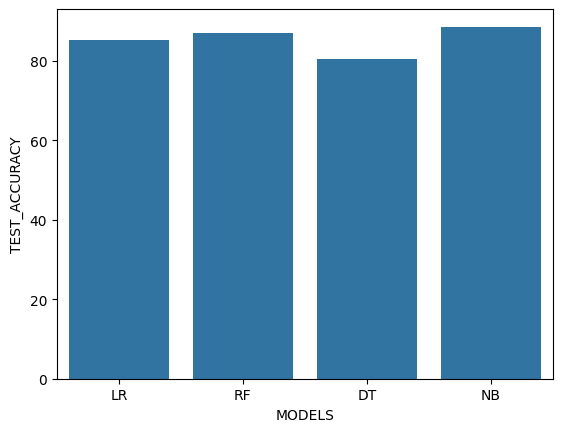

In [ ]:
import seaborn as sns
sns.barplot(x="MODELS", y="TEST_ACCURACY", data=final_data)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
new_data=pd.DataFrame({
    'age':48,
    'sex':0,
    'cp':2,
    'trtbps':130,
    'chol':275,
    'fbs':0,
    'restecg':1,
    'thalachh':139,
    'exng':0,
    'oldpeak':0.2,
    'slp':2,
    'caa':0,
    'thall':2 }, index=[10])



In [ ]:
new_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
10,48,0,2,130,275,0,1,139,0,0.2,2,0,2


In [ ]:
p=rf.predict(new_data)
if p[0]==0:
  print("No heart disease")
else:
  print("heart disease")

heart disease
